In [114]:
%load_ext autoreload
%autoreload 2
%matplotlib inline

import os
from functools import reduce
import sys
sys.path.append(os.environ['ROOT_DIR'])
from setting import *

import matplotlib.pylab as plt
import pandas as pd
import random
import seaborn as sns
from tqdm import *
import numpy as np

from src.data.helper import *
from src.visualization.visualize import MailCenter,RoyalMail
from src.model.benchmark import *

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


# Load different models

Loading the different models to be able to fairly compare them. Select for all of them the period given by the benchmark

## Benchmark given by RM

In [145]:
bench = Results('RM_BENCHMARK',label='RM Benchmark')
stl = Results('STL_MODEL',label='Se+ES')
stlarima = Results('STLARIMA_MODEL',label='Se+ARIMA')
rf = Results('RFMIMO',label='RF')
stlrf = Results('STL_RF',label='Se+RF')

# Overview 

We have some variation in the number of records that arise from the failure of different model in different situation

In [116]:
len(bench.df),len(stl.df),len(stlarima.df),len(rf.df),len(stlrf.df)

(247409, 239249, 245470, 233040, 224790)

## SMAPE Distribution 

In [170]:
comparison = ModelComparison([bench,rf,stlarima,stl,stlrf])

100%|██████████| 5/5 [01:00<00:00, 11.89s/it]


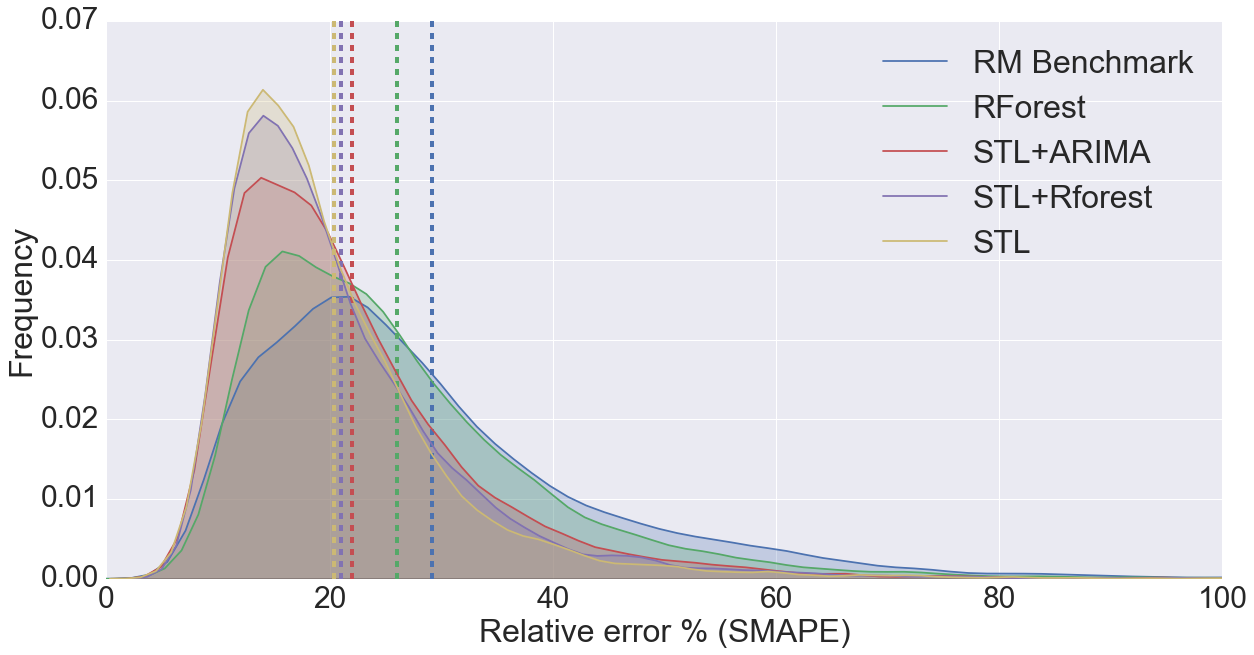

In [494]:
comparison.distribution_SMAPE(name_fig='SMAPE_distrib')

In [117]:
comparison = ModelComparison([bench,stl])

In [123]:
c= sns.color_palette('deep',5)

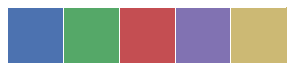

In [124]:
sns.palplot(c)

In [155]:
print('s-rf: {}'.format(comparison.SMAPE(stlrf.df.ytrue,stlrf.df.yhat)))
print('s-arima: {}'.format(comparison.SMAPE(stlarima.df.ytrue,stlarima.df.yhat)))
print('s-em: {}'.format(comparison.SMAPE(stl.df.ytrue,stl.df.yhat)))
print('rf: {}'.format(comparison.SMAPE(rf.df.ytrue,rf.df.yhat)))
print('bench: {}'.format(comparison.SMAPE(bench.df.ytrue,bench.df.yhat)))

s-rf: 20.9735473161
s-arima: 22.0085695953
s-em: 20.3694505708
rf: 25.8952094481
bench: 29.4510827047


100%|██████████| 5/5 [00:45<00:00,  9.05s/it]


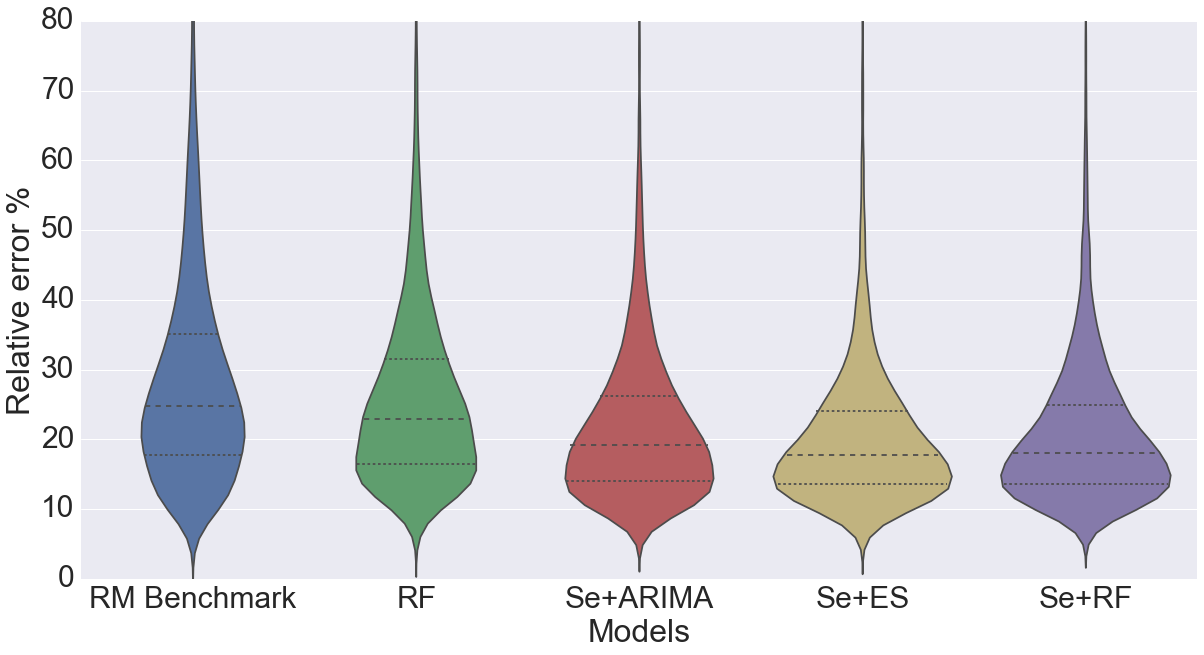

In [172]:
comparison = ModelComparison([bench,rf,stlarima,stl,stlrf])
palette = {bench.label:sns.color_palette('deep')[0],
           rf.label:sns.color_palette('deep')[1],
           stlarima.label:sns.color_palette('deep')[2],
           stlrf.label:sns.color_palette('deep')[3],
           stl.label:sns.color_palette('deep')[4]
          }
comparison.distribution_SMAPE_violin(name_fig='SMAPE_distrib_violin_stlarima',width=20,palette=palette)

100%|██████████| 2/2 [00:15<00:00,  8.03s/it]


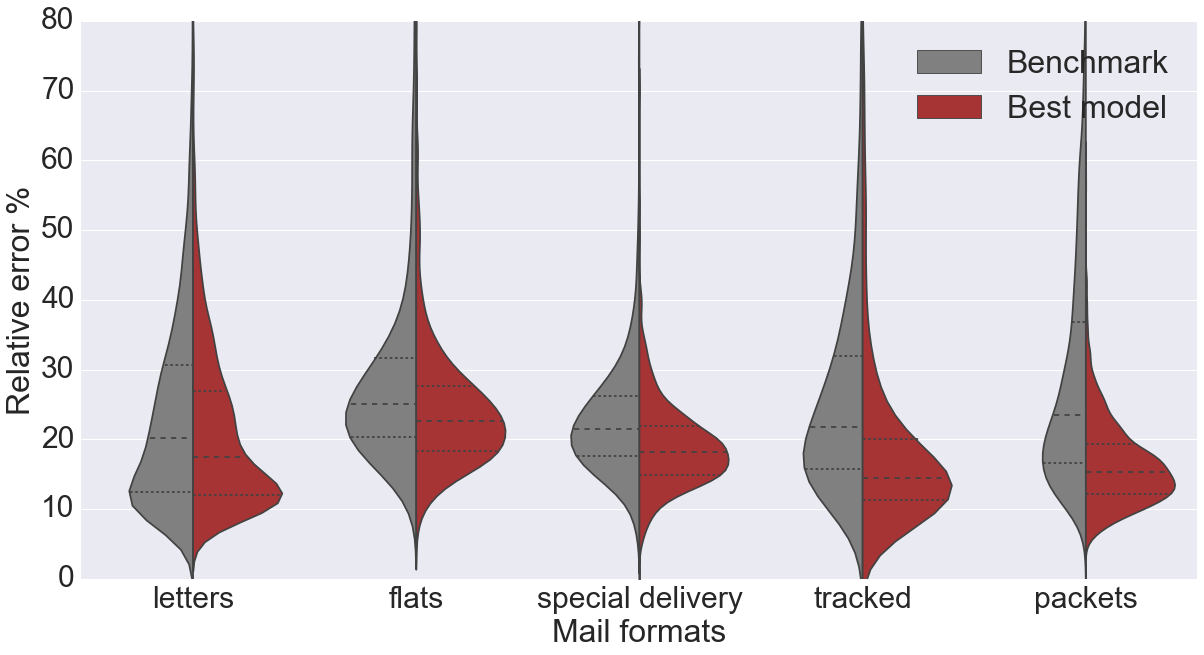

In [686]:
SMAPES = comparison.distribution_SMAPE_violin_BYmail('dist_SMAPE_violin_ByMail')

## Accuracy with time 

In [4]:
from src.model.benchmark import *

In [6]:
st = Stream('preston mail centre','chorley do','T0076')

In [83]:
shared_pipeline = Pipeline([
            ('RemoveOutlierTransformer', RemoveOutlierTransformer()),
            ('SundayRemover', SundayTransformer()),
            ('BankHollidayTransformer', BankHollidayTransformer('')),
            ('SimpleFillInputer', SimpleFillInputer(0.0))])
train,test= st.train_test_split(shared_pipeline)
df = train.append(test)

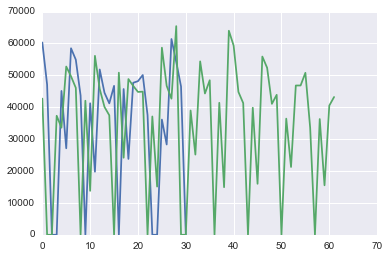

In [105]:
ax = plt.subplot(111)
y2015 = df['2015-05']
day2016 = y2015.index[0]+relativedelta(years=1, weekday=weekday(y2015.index[0].day))
day2016 = day2016 - relativedelta(days=+3)
y2016 = df[day2016:]
ax.plot(y2015.values)
ax.plot(y2016.values)

In [104]:
y2015.index[0].day,y2016.index[0].day

(1, 1)

In [86]:
day2016

Timestamp('2016-05-03 00:00:00', offset='D')

In [71]:
pd.to_datetime('2016-01-01')

Timestamp('2016-01-01 00:00:00')

In [74]:
weekday(pd.to_datetime('2016-01-01').day)

TU

In [76]:
pd.to_datetime('2016-01-01')+relativedelta(years=-1,weekday=weekday(pd.to_datetime('2016-01-01').day))

Timestamp('2015-01-06 00:00:00')

In [55]:
y2016.index[0].strftime('%A')

'Sunday'

# Forecast 

NameError: name 'chorleu' is not defined

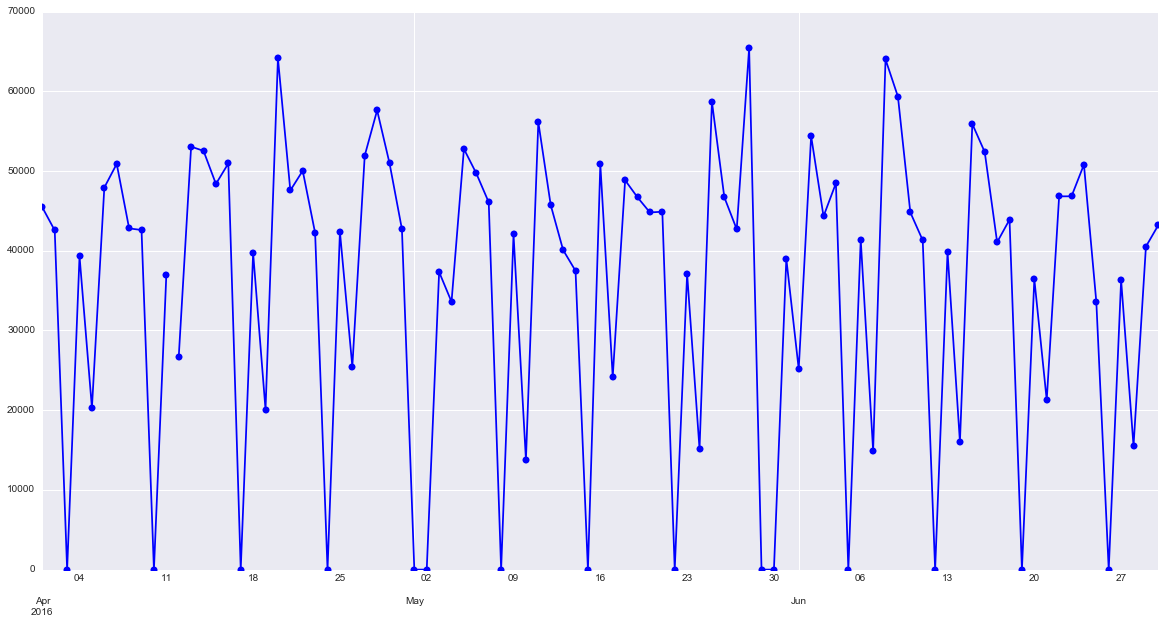

In [169]:
fig = plt.figure(figsize=(20,10))
ax = plt.subplot(111)
train["2016-04":].cnt.plot(c='b',marker='o')
test["2016"].cnt.plot(c='b',marker='o')
chorleu.yhat_ensemble.plot(color='r')
ax.fill_between(chorleu.index,chorleu.Lo80_STL,chorleu.Hi80_STL,alpha=0.2)
ax.set_xlabel('', size=32)
ax.set_ylabel('Mail count', size=32)
ax.legend(fontsize=32,loc='upper left')
ax.set_ylim(0,90000)
ax.tick_params(axis='both', which='major', labelsize=30)

In [718]:
df.groupby(['MC','DO','stream']).get_group()

,MC,DO,stream,date,ytrue,yhat_STL,Lo80_STL,Hi80_STL,Lo95_STL,Hi95_STL,...,Hi80_STL_Rforest,Lo95_STL_Rforest,Hi95_STL_Rforest,stlres_ytrue_STL_Rforest,stlres_yhat_STL_Rforest,stlres_error_STL_Rforest,stlres_stdhat_STL_Rforest,stlhat_STL_Rforest,yhat_ensemble,mail
0,aberdeen mail centre,altens do,T0001,2016-05-09,3872.0,4698.467802,-1146.866307,10543.801912,-4241.199270,13638.134875,...,10543.801912,-4241.199270,13638.134875,-826.467802,584.643836,991.786880,NaN,4698.467802,4549.068635,letters
1,aberdeen mail centre,altens do,T0001,2016-05-11,4582.0,5405.688069,-638.653448,11450.029585,-3838.334569,14649.710706,...,11450.029585,-3838.334569,14649.710706,-823.688069,1124.895721,1509.294678,NaN,5405.688069,5439.472716,letters
2,aberdeen mail centre,altens do,T0001,2016-05-12,4685.0,6120.880160,-20.547291,12262.307611,-3271.622600,15513.382920,...,12262.307611,-3271.622600,15513.382920,-1435.880160,373.347310,1063.027308,NaN,6120.880160,5951.768002,letters
3,aberdeen mail centre,altens do,T0001,2016-05-13,4433.0,5645.448287,-591.554029,11882.450603,-3893.223617,15184.120190,...,11882.450603,-3893.223617,15184.120190,-1212.448287,8.351336,416.303556,NaN,5645.448287,5345.540737,letters
4,aberdeen mail centre,altens do,T0001,2016-05-14,4048.0,5217.638919,-1113.495628,11548.773466,-4464.995808,14900.273646,...,11548.773466,-4464.995808,14900.273646,-1169.638919,226.514458,1134.661643,NaN,5217.638919,5027.684648,letters
5,aberdeen mail centre,altens do,T0001,2016-05-16,2467.0,4698.467802,-1725.419760,11122.355364,-5126.020420,14522.956025,...,11122.355364,-5126.020420,14522.956025,-2231.467802,-226.631188,755.591175,NaN,4698.467802,4400.807641,letters
6,aberdeen mail centre,altens do,T0001,2016-05-17,4467.0,4928.191524,-1587.128742,11443.511790,-5036.130952,14892.514001,...,11443.511790,-5036.130952,14892.514001,-461.191524,559.202233,1069.178338,NaN,4928.191524,4874.973973,letters
7,aberdeen mail centre,altens do,T0001,2016-05-18,3592.0,5405.688069,-1199.799418,12011.175555,-4696.533271,15507.909408,...,12011.175555,-4696.533271,15507.909408,-1813.688069,-134.059912,666.600879,NaN,5405.688069,5126.191584,letters
8,aberdeen mail centre,altens do,T0001,2016-05-19,9292.0,6120.880160,-573.560197,12815.320517,-4117.382855,16359.143175,...,12815.320517,-4117.382855,16359.143175,3171.119840,485.867750,741.805274,NaN,6120.880160,6088.531933,letters
9,aberdeen mail centre,altens do,T0001,2016-05-20,8074.0,5645.448287,-1136.778372,12427.674945,-4727.072292,16017.968865,...,12427.674945,-4727.072292,16017.968865,2428.551713,589.451118,1123.257206,NaN,5645.448287,5631.859883,letters


In [692]:
bench.fname

'/Users/cthorey/Documents/project/RM-DS/models/RM_BENCHMARK_ALL.csv'

In [637]:
comparison = ModelComparison([bench,stlarima,stlrf,stl])

In [671]:
d = df.groupby(('MC','DO','stream')).apply(lambda x: comparison.SMAPE(x.ytrue, x.yhat_ensemble)).reset_index()

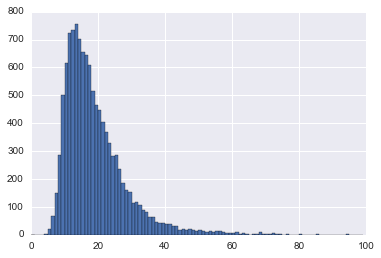

In [672]:
d[0].hist(bins=np.arange(0,100))

In [638]:
df0 = comparison.merge()

In [647]:
comparison.SMAPE(df0.yhat_STL_Rforest,df0.ytrue)
comparison.SMAPE(df0.yhat_RM_Benchmark,df0.ytrue)

20.920489188476179

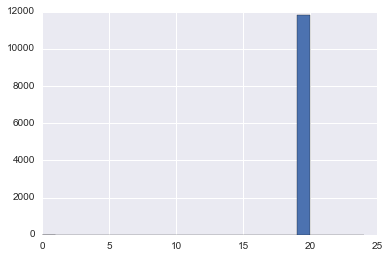

In [631]:
stlrf.df.groupby(['MC','DO','stream']).size().hist(bins = np.arange(0,25,1))

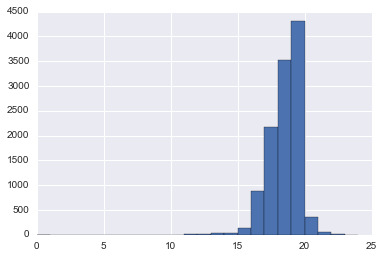

In [623]:
df.groupby(['MC','DO','stream']).size().hist(bins = np.arange(0,25,1))

In [612]:
de = df[(df.yhat_RM_Benchmark>40)&(df.yhat_STL<20)]

In [618]:
de.groupby(['MC','DO','stream

,MC,DO,stream,date,ytrue,mail_RM_Benchmark,day_RM_Benchmark,yhat_RM_Benchmark,yhat_RForest,error_RForest,...,stlres_error_STL_Rforest,stlres_stdhat_STL_Rforest,stlhat_STL_Rforest,yhat_STL,Lo80_STL,Hi80_STL,Lo95_STL,Hi95_STL,yhat_ensemble,mail
2893,aberdeen mail centre,stonehaven do,T0003,2016-05-09,365.0,letters,Monday,2571.05,491.153416,55.289145,...,173.760274,NaN,-51.862506,0.0,-1570.255098,1466.530087,-2374.043583,2270.318572,50.234127,letters
2898,aberdeen mail centre,stonehaven do,T0003,2016-05-16,259.0,letters,Monday,2359.36,501.283913,54.828322,...,722.595531,NaN,-51.862506,0.0,-1620.506205,1516.781193,-2450.896019,2347.171007,27.650872,letters
2904,aberdeen mail centre,stonehaven do,T0003,2016-05-23,229.0,letters,Monday,2134.65,489.250178,41.809133,...,619.514222,NaN,-51.862506,0.0,-1669.196746,1565.471734,-2525.361775,2421.636764,27.262687,letters


In [616]:
de

,MC,DO,stream,date,ytrue,mail_RM_Benchmark,day_RM_Benchmark,yhat_RM_Benchmark,yhat_RForest,error_RForest,...,stlres_error_STL_Rforest,stlres_stdhat_STL_Rforest,stlhat_STL_Rforest,yhat_STL,Lo80_STL,Hi80_STL,Lo95_STL,Hi95_STL,yhat_ensemble,mail
2893,aberdeen mail centre,stonehaven do,T0003,2016-05-09,365.0,letters,Monday,2571.05,491.153416,55.289145,...,173.760274,NaN,-51.862506,0.000000,-1570.255098,1466.530087,-2374.043583,2270.318572,50.234127,letters
2898,aberdeen mail centre,stonehaven do,T0003,2016-05-16,259.0,letters,Monday,2359.36,501.283913,54.828322,...,722.595531,NaN,-51.862506,0.000000,-1620.506205,1516.781193,-2450.896019,2347.171007,27.650872,letters
2904,aberdeen mail centre,stonehaven do,T0003,2016-05-23,229.0,letters,Monday,2134.65,489.250178,41.809133,...,619.514222,NaN,-51.862506,0.000000,-1669.196746,1565.471734,-2525.361775,2421.636764,27.262687,letters
3305,aberdeen mail centre,westhill do,T0064,2016-05-23,27.0,special delivery,Monday,40.68,17.868406,0.696577,...,4.935551,NaN,17.696023,17.696023,-22.508295,57.900341,-43.791176,79.183222,18.164837,special delivery
4816,birmingham mail centre,chelmsley wood do,T0064,2016-05-16,32.0,special delivery,Monday,74.36,37.497682,7.997412,...,15.327635,NaN,19.102016,19.102016,-25.084691,63.288724,-48.475721,86.679754,20.187981,special delivery
5373,birmingham mail centre,droitwich do,T0064,2016-05-16,39.0,special delivery,Monday,44.89,26.281866,0.682681,...,9.977507,NaN,17.664602,17.664602,-23.425038,58.754243,-45.176579,80.505784,19.382584,special delivery
7516,birmingham mail centre,ledbury do,T0095,2016-05-09,45.0,packets,Monday,95.49,66.360355,3.043221,...,21.251637,NaN,17.307678,17.307678,-45.507557,80.122913,-78.759934,113.375290,20.492179,packets
7521,birmingham mail centre,ledbury do,T0095,2016-05-16,29.0,packets,Monday,93.80,66.454008,3.097997,...,8.919056,NaN,17.307678,17.307678,-51.048732,85.664088,-87.234429,121.849785,16.789380,packets
7527,birmingham mail centre,ledbury do,T0095,2016-05-23,26.0,packets,Monday,91.60,66.556359,2.957334,...,36.586318,NaN,17.307678,17.307678,-56.173230,90.788585,-95.071672,129.687028,14.372509,packets
13561,bristol mail centre,cheddar do,T0095,2016-05-18,19.0,packets,Wednesday,41.05,31.963243,0.879791,...,6.737879,NaN,19.282975,19.282975,-54.270400,92.836349,-93.207205,131.773154,19.684317,packets


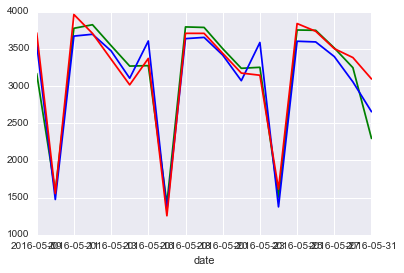

In [609]:
df.groupby(('date')).yhat_ensemble.mean().plot(color='g')
df.groupby(('date')).yhat_RM_Benchmark.mean().plot(color='b')
df.groupby(('date')).ytrue.mean().plot(color='r')

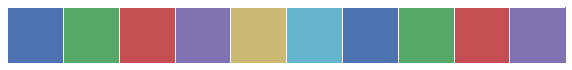

In [611]:
sns.palplot(sns.color_palette('deep',10))

In [ ]:
df.yhat_RM_Benchmark

In [ ]:
df.info()

In [ ]:
os.path.join(folder,folder1,folde3)

# Other insights

Make the same plot but for parcel/mail...

In [564]:
df = comparison.merge()

In [568]:
comparison.SMAPE(df.yhat_ensemble,df.ytrue)

19.246694933175064

In [533]:
rf.df.loc[pd.to_datetime('2016-05-10')]

KeyError: 'the label [2016-05-10 00:00:00] is not in the [index]'

In [522]:
de = df[(df.yhat_RM_Benchmark>40)&(df.yhat_STL<20)]

In [437]:
comparison.SMAPE(bench.df.yhat,bench.df.ytrue)

29.451082704656216

In [441]:
len(bench.df)

247409

In [438]:
len(df)

201298

In [434]:
comparison.SMAPE(df.ytrue,(df.yhat_STL+df.yhat_STL_ARIMA+df.yhat_STL_Rforest)/3.0)

19.306812523507226

In [566]:
df.to_csv(os.path.join(MODELS_DIR,'all_together.csv'))

In [415]:
comparison.SMAPE(df.yhat_STL_Rforest,df.ytrue_STL)

20.710410671056433

In [ ]:
comparison.SMAPE(df.yhat_STL,df.ytrue_STL)

In [421]:
comparison.SMAPE(df.ytrue_RM_Benchmark,(df.yhat_STL+df.yhat_STL_ARIMA+df.yhat_STL_Rforest+0.1*df.yhat_RForest)/3.1)

19.739418831249562

In [389]:
Sdf.yhat_STL_ARIMA+df.yhat_STL

0         3665.626463
1         3867.354041
2         4382.146290
3         5240.196376
4         4737.374302
5         4421.261649
6         4032.118505
7         4209.336637
8         4701.258527
9         5537.967730
10        5015.231959
11        4257.875250
12        4419.995720
13        4897.829617
14        5721.392971
15        5186.390492
16        4840.249524
17        4549.760363
18        1145.318923
19        2011.721695
20        2402.291156
21        2413.613352
22        2369.529869
23        1979.437740
24        1146.012373
25        2012.048939
26        2402.492146
27        2413.711997
28        2369.588434
29        1979.454872
             ...     
230500     141.531548
230501     229.107027
230502     209.796558
230503     189.390247
230504     177.708695
230505     140.545055
230506     143.869738
230507     211.738623
230508     191.140273
230509     179.323415
230510     145.089141
230511      64.390693
230512      69.231495
230513     135.448426
230514    

0        -1469.230155
1        -1319.144546
2         -848.902833
3          -29.337077
4         -565.440795
5         -910.363268
6        -1346.103605
7        -1187.655547
8         -712.024143
9          110.540416
10        -424.481434
11       -1209.857261
12       -1054.750191
13        -583.015697
14         235.242303
15        -304.375483
16        -654.531938
17        -954.201587
18          98.697258
19         964.607859
20        1354.710229
21        1365.570065
22        1321.030900
23         930.033050
24          96.156545
25         961.742651
26        1351.735771
27        1362.505863
28        1317.932788
29         926.900875
             ...     
230500      26.834258
230501     113.908529
230502      94.201023
230503      73.451889
230504      61.494202
230505      23.903032
230506      27.065249
230507      94.688510
230508      73.997541
230509      62.102959
230510      27.705822
230511     -23.127265
230512     -20.088351
230513      44.362330
230514    

In [ ]:
df.ydd

In [373]:
rf.SMAPE(df.ytrue_RForest,(df.yhat_RForest+10*df.yhat_STL)/11.0)

20.347266836252327

In [257]:
x = dist.groupby('model').get_group('RM Benchmark')
y = dist.groupby('model').get_group('STL')

In [273]:
f = x.merge(y,on=['MC','DO','stream'],suffixes=('_benchmark','_stl'))

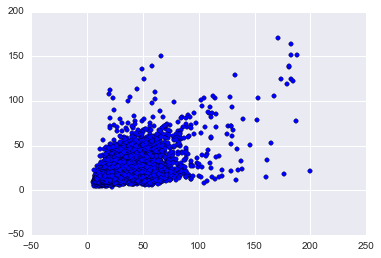

In [275]:
plt.scatter(f.SMAPE_benchmark,f.SMAPE_stl)

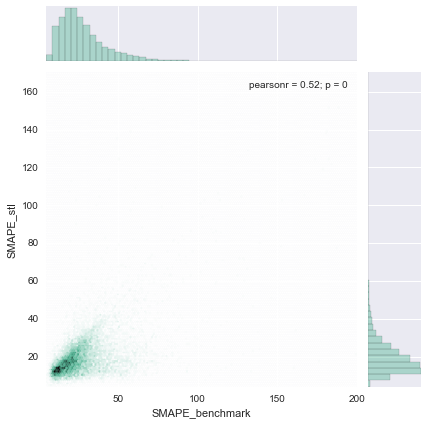

In [278]:
sns.jointplot(f.SMAPE_benchmark, f.SMAPE_stl, kind="hex", color="#4CB391")